<a href="https://colab.research.google.com/github/JoshuaPMallory/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/D2_assignment_regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [X] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [X] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [50]:
# - [X] Engineer at least two new features.
df['bed_bath_ratio']     = df['bedrooms']   / df['bathrooms']
df['appliances_in_unit'] = df['dishwasher'] + df['laundry_in_unit']
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,bed_bath_ratio,appliances_in_unit
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,0


In [0]:
# - [X] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
from sklearn.metrics import mean_absolute_error


train = df[df['created'].str.contains('-0[4-5]')]
test  = df[df['created'].str.contains('-06')]


In [0]:
# Shamelessly copy-pasted from the lecture. I'm not gonna figure this part out on my own.

import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [90]:
# - [ ] Fit a linear regression model with at least two features.
import plotly.express as px


target   = 'price'
features = ['latitude', 'longitude']
# features = ['bed_bath_ratio', 'appliances_in_unit']
# This one has Nan's and it's very small on the axis'

regression_3d(train
             ,x     = features[0]
             ,y     = features[1]
             ,z     = target
             ,title = '3d plot'
             )

In [98]:
# Arrange y target vectors
y_train = train[target]
y_test  = test[target]

# Get mean baseline
print('Mean Baseline (using 0 features)')
guess   = y_train.mean()

# Train Error
y_pred  = [guess] * len(y_train)
mae     = mean_absolute_error(y_train, y_pred)
print(f'Train Error (1952-2004 elections): {mae:.2f} percentage points')

# Test Error
y_pred  = [guess] * len(y_test)
mae     = mean_absolute_error(y_test, y_pred)
print(f'Test Error (2008-16 elections): {mae:.2f} percentage points')


print()


# Re-arrange X features matrices
print(f'Linear Regression, dependent on: {features}')
X_train  = train[features]
X_test   = test[features]

# Fit the model

model.fit(X_train, y_train)


y_pred  = model.predict(X_train)
mae     = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} percentage points')

# Apply the model to new data

y_pred  = model.predict(X_test)
mae     = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} percentage points')




model.intercept_, model.coef_

Mean Baseline (using 0 features)
Train Error (1952-2004 elections): 1201.37 percentage points
Test Error (2008-16 elections): 1203.66 percentage points

Linear Regression, dependent on: ['latitude', 'longitude']
Train Error: 1146.94 percentage points
Test Error: 1145.42 percentage points


(-1291180.9121947698, array([  2236.21599994, -16271.22280934]))

In [0]:
# - [ ] Get the model's coefficients and intercept.
                     import numpy as np
from sklearn.metrics import mean_absolute_error


features = ['latitude', 'longitude']
target   = 'price'

X_train = train[features]
y_train = train[target]
X_test  = test[features]
y_test  = test[target]


model.fit(X_train, y_train)


#TRAIN
y_pred = model.predict(X_train)
mae    = mean_absolute_error(y_train, y_pred)
mse    = mean_squared_error()
rmse   = np.sqrt(mse)
r2     = 
mae, rmse, r2


#TEST
y_pred = model.predict(X_test)
mae    = mean_absolute_value(y_test, y_pred)
mse    = mean_squared_error()
rmse   = np.sqrt(mse)
r2     = 
mae, rmse, r2

model.coef_, model.intercept_

# I'm just going to have to figure this out later

In [0]:
# - [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.


In [0]:
# - [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!


In [0]:
# - [ ] As always, commit your notebook to your fork of the GitHub repo.



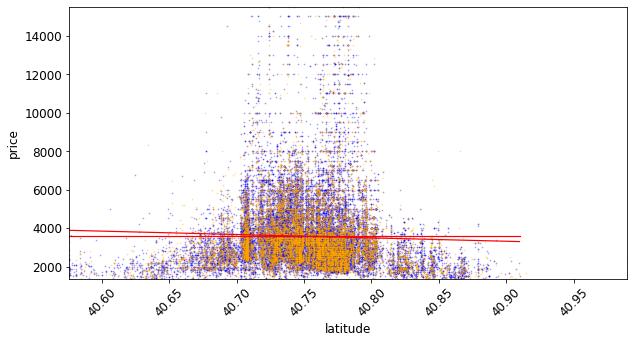

In [100]:
                          import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



target   = 'price'
features = ['latitude', 'longitude']
model    = LinearRegression()

fig, ax  = plt.subplots(figsize = (10, 5))


# This creates a list which holds a number of slices along the x-axis
# as determined by the accuracy variable
accuracy         = 0.001
regression_line  = [[c] for c in np.arange(train[features[0]].min()
                                          ,train[features[0]].max()
                                          ,accuracy
                                          )
                   ]

dummy_regression = [train[target].mean()] * 2


ax.scatter(x = train[features[0]]
          ,y = train[target]
          ,s = 0.5
          ,color = 'blue'
          ,alpha = 0.3
          )
ax.scatter(x = test[features[0]]
          ,y = test[target]
          ,s = 0.5
          ,color = 'orange'
          ,alpha = 0.3
          )

# Linear Regression line
model.fit(train[[features[0]]]
         ,train[[target]]
         )
ax.plot(regression_line
       ,model.predict(regression_line)
       ,color     = 'red'
       ,linewidth = 1.2
       )

# Average
ax.plot([train[features[0]].min(), train[features[0]].max()]
       ,dummy_regression
       ,color = 'red'
       ,linewidth = 1.2
       )

# X-axis
plt.xlabel(features[0]
          ,fontsize = 12
          )
plt.xticks(rotation = 45
          ,fontsize = 12
          )
plt.xlim((df[features[0]].min()
         ,df[features[0]].max()
         )
        )

# Y-axis
plt.ylabel(target
          ,fontsize = 12
          )
plt.yticks(fontsize = 12)
plt.ylim((df[target].min()
         ,df[target].max())
        )


plt.show()

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !